# MiNet: A Convolutional Neural Network for the Detection of Minerals

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

## Data

In [3]:
path = Path('data/minet')

In [4]:
tfms = get_transforms(flip_vert=True)

In [5]:
np.random.seed(672)
data = ImageDataBunch.from_folder(path, valid_pct=0.2, ds_tfms=tfms, size=224).normalize(imagenet_stats)

**let's take a look at some of the images**

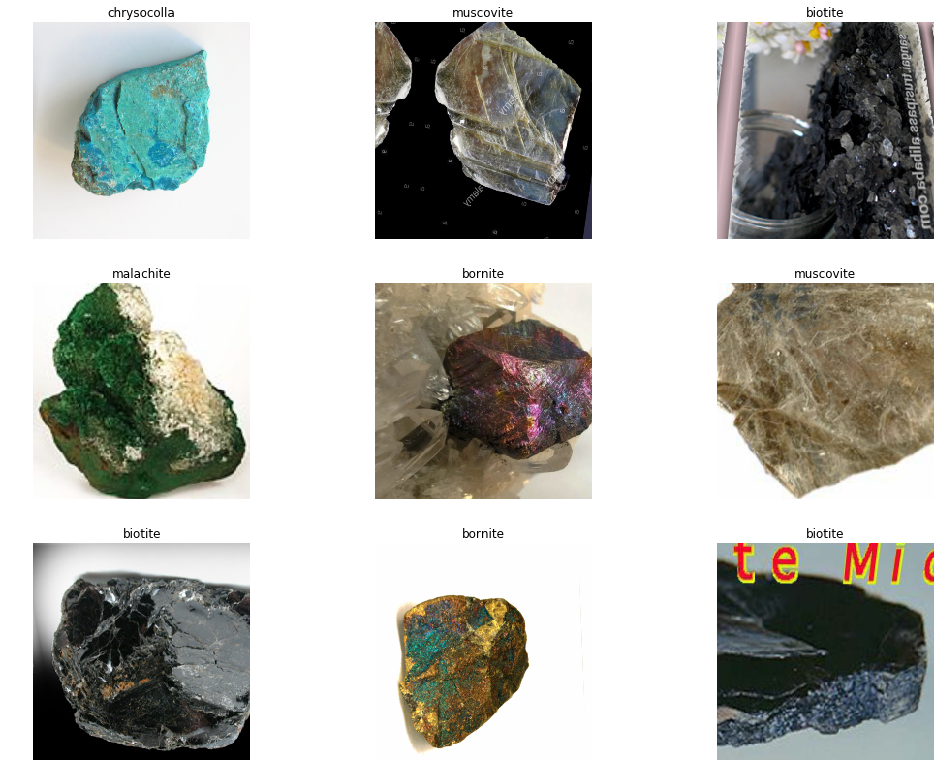

In [6]:
data.show_batch(3, figsize=(15, 11))

In [7]:
data.classes

['biotite',
 'bornite',
 'chrysocolla',
 'malachite',
 'muscovite',
 'pyrite',
 'quartz']

## Model

In [8]:
learn = create_cnn(data, models.resnet34, metrics=accuracy)

In [9]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


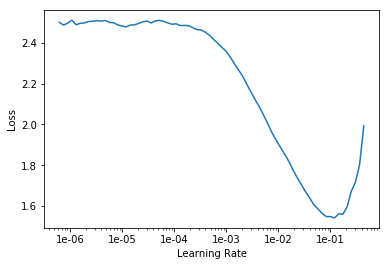

In [10]:
learn.recorder.plot()

In [11]:
lr = 1e-2
learn.fit_one_cycle(10, slice(lr))

epoch,train_loss,valid_loss,accuracy
1,1.876858,1.062003,0.652632
2,1.290484,0.446886,0.847368
3,0.956246,0.416436,0.878947
4,0.782024,0.358384,0.863158
5,0.665080,0.333447,0.873684
6,0.548959,0.367658,0.884211
7,0.471523,0.359916,0.884211
8,0.408840,0.332755,0.857895
9,0.362578,0.331037,0.847368
10,0.332784,0.330162,0.847368


In [12]:
learn.save('stage-1-r34')

### Unfreeze and finetune

In [16]:
learn.load('stage-1-r34');

In [13]:
learn.unfreeze()
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


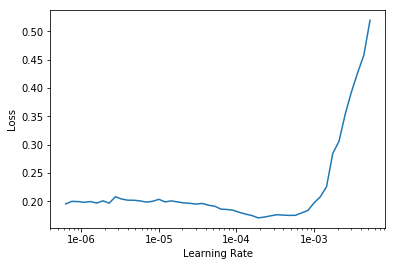

In [14]:
learn.recorder.plot()

In [15]:
learn.fit_one_cycle(10, slice(1e-5, lr/10))

epoch,train_loss,valid_loss,accuracy
1,0.166203,0.324095,0.852632
2,0.153079,0.303550,0.889474
3,0.141619,0.333908,0.889474
4,0.131213,0.331891,0.900000
5,0.135614,0.350903,0.894737
6,0.125566,0.305301,0.926316
7,0.114177,0.293647,0.910526
8,0.099623,0.277354,0.926316
9,0.091299,0.266702,0.926316
10,0.080497,0.261259,0.926316


In [21]:
learn.save('stage-2-r34')

## Model Interpretation

In [16]:
interp = ClassificationInterpretation.from_learner(learn)

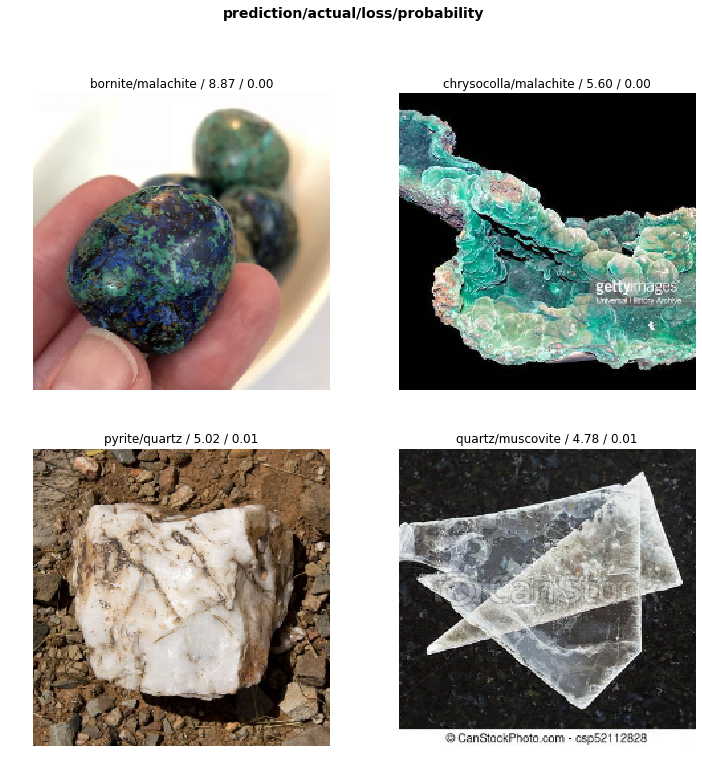

In [17]:
interp.plot_top_losses(4)

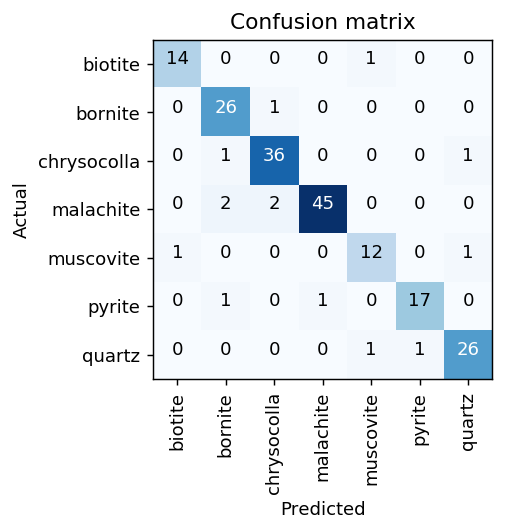

In [41]:
interp.plot_confusion_matrix(dpi=130)

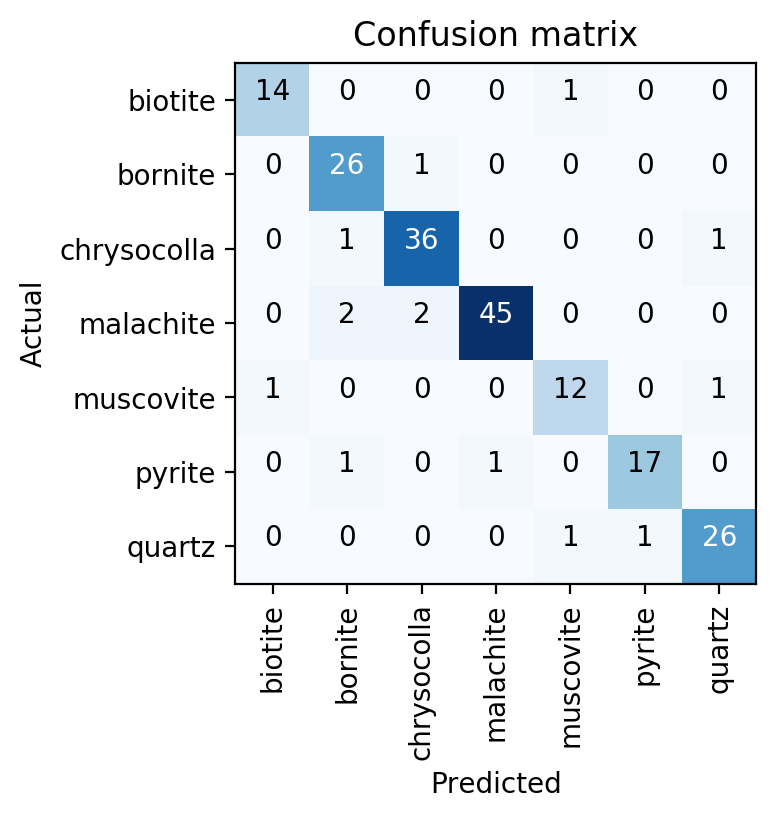

In [37]:
interp.plot_confusion_matrix(dpi=200)

number of images in training and validation sets

In [25]:
len(data.train_ds), len(data.valid_ds)

(762, 190)

total number of images

In [29]:
762 + 190

952

In [43]:
classes = data.classes

In [61]:
for clas in classes:
    print(f'{clas}: {len(get_image_files(path/clas))}')

biotite: 68
bornite: 171
chrysocolla: 164
malachite: 234
muscovite: 79
pyrite: 99
quartz: 137


In [63]:
68 + 171 + 164 + 234 + 79 + 99 + 137

952